In [1]:
# 📚 Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, false_negative_rate
from sklearn.metrics import accuracy_score


In [2]:
# 📂 Step 2: Load Data + Predictions
df_data  = pd.read_csv("../data/loan_dataset.csv")
df_preds = pd.read_csv("../results/baseline_predictions.csv")
df       = pd.concat([df_data, df_preds], axis=1)
df.head()


,age,income,loan_amount,credit_score,gender,race,region,loan_approved,y_true,y_pred,y_prob
0,59,46646,28139,836,Female,White,Suburban,1,1,1,0.855555
1,49,43049,12613,765,Male,Other,Urban,1,1,1,0.898416
2,35,99605,11589,388,Male,Hispanic,Urban,0,0,1,0.630427
3,63,118116,14918,567,Male,Hispanic,Rural,1,1,1,0.802063
4,28,117379,21119,788,Male,Other,Rural,1,1,0,0.462140


In [3]:
# 👀 Step 3: Overall Accuracy
overall_acc = accuracy_score(df['y_true'], df['y_pred'])
print(f"🎯 Overall Accuracy: {overall_acc:.3f}")


🎯 Overall Accuracy: 0.834


In [4]:
# 🧮 Step 4: Compute Bias Metrics (by Gender)
metrics_gender = MetricFrame(
    metrics={
        "accuracy": accuracy_score,
        "selection_rate": selection_rate,
        "false_positive_rate": false_positive_rate,
        "false_negative_rate": false_negative_rate
    },
    y_true=df["y_true"],
    y_pred=df["y_pred"],
    sensitive_features=df["gender"]
)

metrics_gender.by_group


,accuracy,selection_rate,false_positive_rate,false_negative_rate
gender,,,,
Female,0.853846,0.607692,0.166667,0.134146
Male,0.812500,0.633333,0.258427,0.145695


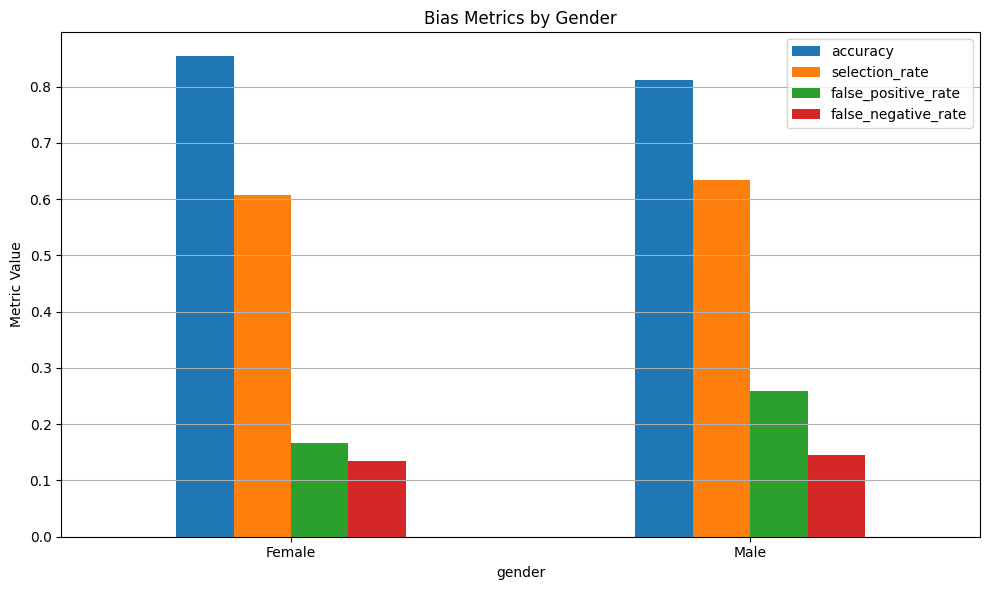

In [5]:
# 📊 Step 5: Visualize Bias Metrics (by Gender)
metrics_gender.by_group.plot(kind="bar", figsize=(10,6))
plt.title("Bias Metrics by Gender")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [6]:
# 📊 Step 6: Bias Metrics (by Race)
metrics_race = MetricFrame(
    metrics={
        "accuracy": accuracy_score,
        "selection_rate": selection_rate,
        "false_positive_rate": false_positive_rate,
        "false_negative_rate": false_negative_rate
    },
    y_true=df["y_true"],
    y_pred=df["y_pred"],
    sensitive_features=df["race"]
)

metrics_race.by_group


,accuracy,selection_rate,false_positive_rate,false_negative_rate
race,,,,
Asian,0.885057,0.609195,0.166667,0.078431
Black,0.890000,0.620000,0.135135,0.095238
Hispanic,0.828829,0.630631,0.225000,0.140845
Other,0.770642,0.587156,0.250000,0.217391
White,0.806452,0.655914,0.281250,0.147541


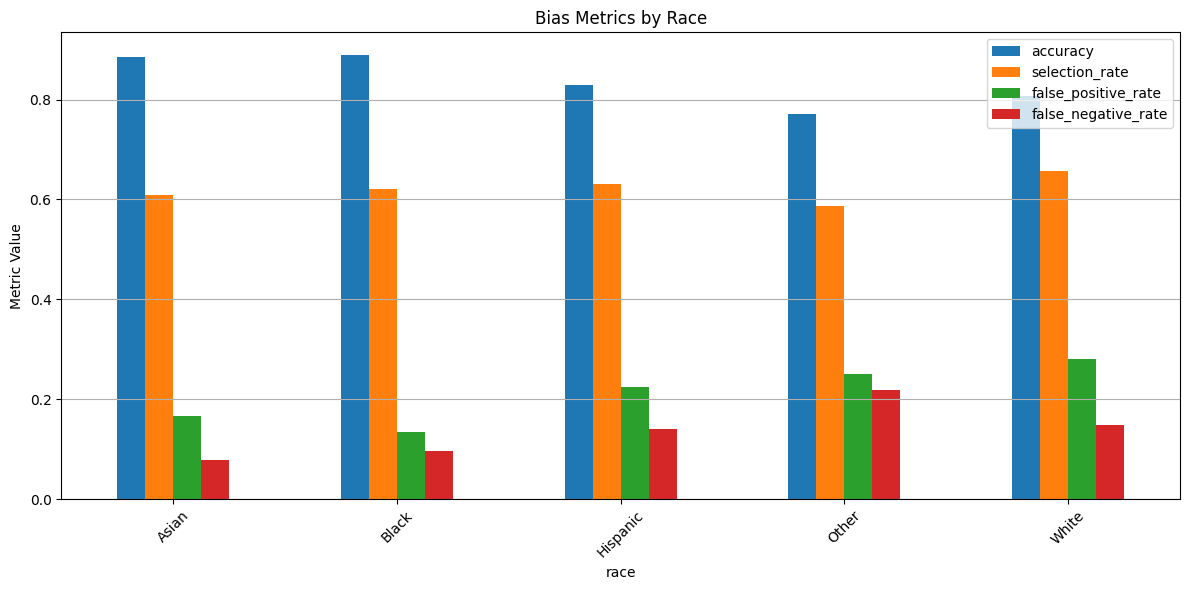

In [7]:
# 🖼️ Step 7: Visualize Bias Metrics (by Race)
metrics_race.by_group.plot(kind="bar", figsize=(12,6))
plt.title("Bias Metrics by Race")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


In [9]:
# 📌 Step 8: Save Metrics to Markdown Report
with open("../results/fairness_baseline.md", "w") as f:
    f.write("### Fairness Audit for Baseline Model\n\n")
    f.write("**By Gender**\n\n")
    f.write(metrics_gender.by_group.to_markdown())
    f.write("\n\n**By Race**\n\n")
    f.write(metrics_race.by_group.to_markdown())

print("✅ Fairness metrics saved to results/fairness_baseline.md")


✅ Fairness metrics saved to results/fairness_baseline.md
